In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generación de número pseudoaleatorios

**Linear Congruential Generator**

Dado $X_0$ entonces para cada $n=0,1,\ldots$ aplicar
$$X_{n+1}=aX_n+c\,\text{mod}\, m$$

In [ ]:
def random(Xi, a, c, m):
    Xii = (a*Xi + c)%m
    return Xii

In [ ]:
a = 11
c = 0
m = 16
X0 = 1
n = 20 # Cantidad de números a ser generados
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi)
print(X)

[1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1]


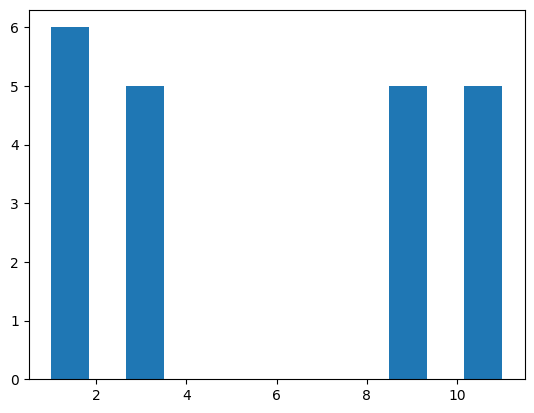

In [ ]:
plt.hist(X,bins=12)
plt.show(True)

# Generación Uniforme

In [ ]:
a = 11
c = 0
m = 16
X0 = 1
n = 20 # Cantidad de números a ser generados
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi/m)
print(X)

[1, 0.6875, 0.5625, 0.1875, 0.0625, 0.6875, 0.5625, 0.1875, 0.0625, 0.6875, 0.5625, 0.1875, 0.0625, 0.6875, 0.5625, 0.1875, 0.0625, 0.6875, 0.5625, 0.1875, 0.0625]


In [ ]:
a = 7**5
c = 0
m = 2**31 - 1
X0 = 1
n = 100 # Cantidad de números a ser generados
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi)
print(X)


[1, 16807, 282475249, 1622650073, 984943658, 1144108930, 470211272, 101027544, 1457850878, 1458777923, 2007237709, 823564440, 1115438165, 1784484492, 74243042, 114807987, 1137522503, 1441282327, 16531729, 823378840, 143542612, 896544303, 1474833169, 1264817709, 1998097157, 1817129560, 1131570933, 197493099, 1404280278, 893351816, 1505795335, 1954899097, 1636807826, 563613512, 101929267, 1580723810, 704877633, 1358580979, 1624379149, 2128236579, 784558821, 530511967, 2110010672, 1551901393, 1617819336, 1399125485, 156091745, 1356425228, 1899894091, 585640194, 937186357, 1646035001, 1025921153, 510616708, 590357944, 771515668, 357571490, 1044788124, 1927702196, 1952509530, 130060903, 1942727722, 1083454666, 1108728549, 685118024, 2118797801, 1060806853, 571540977, 194847408, 2035308228, 158374933, 1075260298, 824938981, 595028635, 1962408013, 1137623865, 997389814, 2020739063, 107554536, 1635339425, 1654001669, 1777724115, 269220094, 34075629, 1478446501, 1864546517, 1351934195, 15810301

**Semilla de números aleatorios**

In [ ]:
from random import seed

In [ ]:
print("Primeira sequencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)
print('\n')

print("Segunda sequencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)

Primeira sequencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Segunda sequencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


# Distribución Binomial
$$P(k)={n \choose k} p^{k}(1-p)^{n-k}$$

In [ ]:
from scipy.stats import binom
import math

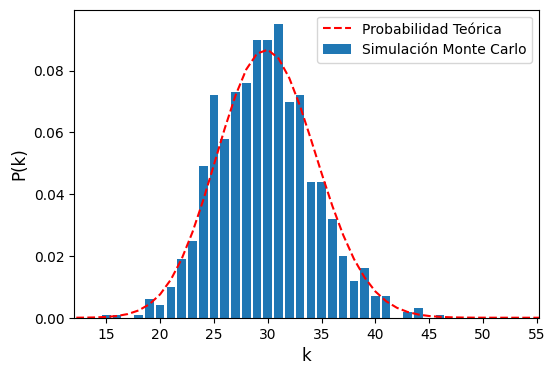

In [ ]:
seed(100) # Semilla

n = 100 # Número de experimentos
p = 0.3 # Probabilidad de éxito.
Pk = np.zeros(n)
vk = np.arange(0,n)
ns = 1000 # Número de Simulaciones

for j in range(0,ns): # Hacer ns simulaciones
    S = 0 # Número de éxitos
    for i in range(0,n): # Hacer para n experimentos
        r = np.random.uniform() #
        if(r <= p): # Si ocurre el evento de éxito
            S = S + 1
    Pk[S] = Pk[S] + 1
Pk=Pk/sum(Pk) # Normalizando
plt.figure(figsize=(6,4))
plt.xlim(0.8*np.min(vk[Pk>0]),1.2*np.max(vk[Pk>0]))
plt.bar(vk, Pk, label='Simulación Monte Carlo')

# curva teórica
Pkt = np.zeros(n+1) # Donde almacenamos los valores teóricos
vkt = np.arange(0,n+1)
for k in range(0,n+1):
    Pkt[k] = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))*(p**k)*(1-p)**(n-k)
plt.plot(vkt, Pkt, 'r--', label='Probabilidad Teórica')

plt.xlabel('k', fontsize = 12)
plt.ylabel('P(k)',fontsize = 12)
plt.legend()
plt.show(True)

# Distribución Geométrica

$$P(k)=(1-p)^{k-1}p$$

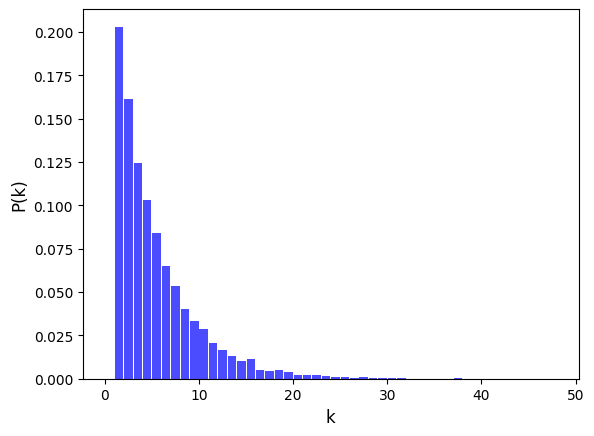

Valor esperado Teórico: 5.0
Valor esperado Simulado: 4.9548


In [ ]:
p = 0.2 # probabilidad de éxito
n = 10000 # Cantidad de puntos extraídos de una distribución Geométrica
X = np.random.geometric(p, size=n)
k = np.arange(0, np.max(X))
count, bins, ignored = plt.hist(X, bins=k, density=True, color='blue',alpha=0.7,
                                rwidth=0.9)
plt.xlabel('k', fontsize = 12)
plt.ylabel('P(k)',fontsize = 12)
plt.show(True)
print("Valor esperado Teórico:", 1/p)
print("Valor esperado Simulado:", np.sum(X)/len(X))

# Distribución de Poisson

$$P(k)=\frac{e^{-\lambda}\cdot \lambda^{k}}{k!}$$

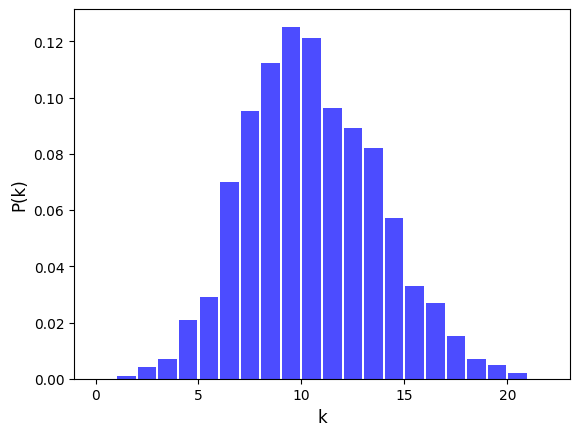

In [ ]:
lbd = 10 #
n = 1000 #
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))
count, bins, ignored = plt.hist(P, bins=k, density=True, color='blue',alpha=0.7,
                                rwidth=0.9)
plt.xlabel('k', fontsize = 12)
plt.ylabel('P(k)',fontsize = 12)
plt.show(True)

# Ley de los eventos raros

$$\displaystyle\lim_{n\to\infty, p\to 0} {n \choose k} p^{k}(1-p)^{n-k}=\frac{e^{-\lambda}\cdot \lambda^{k}}{k!}$$

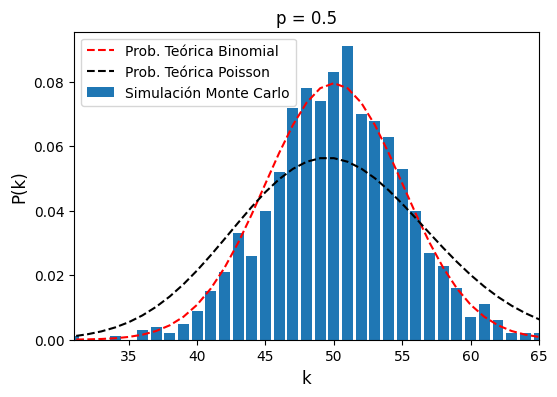

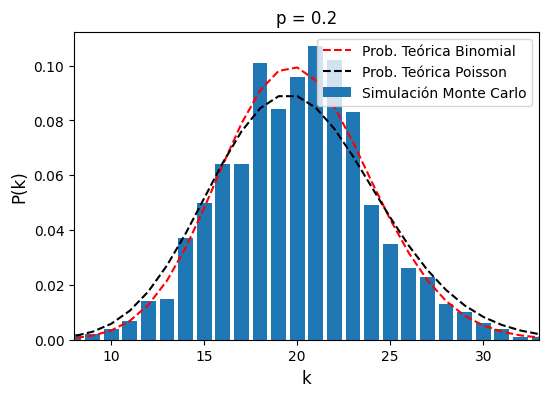

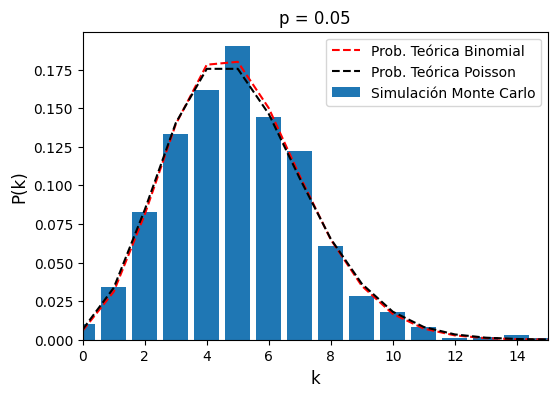

In [ ]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.special import factorial

seed(100)

vp = [0.5, 0.2, 0.05] # probabilidades de éxito
n = 100 # Número de experimentos
for p in vp:
    Pk = np.zeros(n)
    vk = np.arange(0,n)
    ns = 1000 # Número de Simulaciones

    for j in range(0,ns):
        S = 0
        for i in range(0,n):
            r = np.random.uniform()
            if(r <= p):
                S = S + 1
        Pk[S] = Pk[S] + 1
    Pk=Pk/sum(Pk)
    plt.figure(figsize=(6,4))
    plt.xlim(np.min(vk[Pk>0]),np.max(vk[Pk>0]))
    plt.bar(vk, Pk, label='Simulación Monte Carlo')

    # Curva teórica Binomial
    Pkt = np.zeros(n+1)
    vkt = np.arange(0,n+1)
    for k in range(0,n+1):
        Pkt[k] = (factorial(n)/(factorial(n-k)*factorial(k)))*(p**k)*(1-p)**(n-k)
    plt.plot(vkt, Pkt, 'r--', label='Prob. Teórica Binomial')

    # curva teórica Poisson
    Po = np.zeros(n+1)
    vo = np.arange(0,n+1)
    lbd = n*p
    for k in range(0,n+1):
        Po[k] = (np.exp(-lbd)*lbd**k)/factorial(k)
    plt.plot(vo, Po, 'k--', label='Prob. Teórica Poisson')
    plt.title('p = '+ str(p))
    plt.xlabel('k', fontsize = 12)
    plt.ylabel('P(k)',fontsize = 12)
    plt.legend()
    plt.show(True)